In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df = pd.concat([df1, df2])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [253]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [254]:
for col in df.columns:
    if df[col].dtype == 'O':
        print(df[col].unique())
        print('#'*50)

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']
##################################################
['male' 'female']
##################################################
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 

In [255]:
print(df.shape)
df.isna().sum()

(1309, 12)


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [256]:
df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Age','PassengerId'], axis=1, inplace=True)

In [257]:
df.shape

(1309, 6)

In [258]:
df.isna().sum()

Survived    418
Pclass        0
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [259]:
df.dropna(inplace=True)

In [260]:
df.isna().sum()

Survived    0
Pclass      0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [261]:
df.shape

(889, 6)

In [262]:
for col in df.columns:
    print(f"{col} -> {df[col].dtype}")

Survived -> float64
Pclass -> int64
SibSp -> int64
Parch -> int64
Fare -> float64
Embarked -> object


In [263]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked
0,0.0,3,1,0,7.2500,S
1,1.0,1,1,0,71.2833,C
2,1.0,3,0,0,7.9250,S
3,1.0,1,1,0,53.1000,S
4,0.0,3,0,0,8.0500,S


In [264]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [265]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.0,3,1,0,7.2500,0,1
1,1.0,1,1,0,71.2833,0,0
2,1.0,3,0,0,7.9250,0,1
3,1.0,1,1,0,53.1000,0,1
4,0.0,3,0,0,8.0500,0,1


In [267]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [268]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [269]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier

models = {
    'GradientBoostingClassifier': {
        'classifier':GradientBoostingClassifier(),
        'params':{'n_estimators': [100, 200, 300]}
    },

    'AdaBoostClassifier': {
        'classifier':AdaBoostClassifier(),
        'params':{'n_estimators': [100, 200, 300]}
    },

    'BaggingClassifier':{
        'classifier':BaggingClassifier(),
        'params':{'n_estimators': [100, 200, 300]}
    },

    'ExtraTTreesClassifier':{
        'classifier':ExtraTreesClassifier(),
        'params':{'n_estimators': [100, 200, 300]}
    },
}

In [275]:
best_classifier = {}

for model_name, mp in models.items():
    model = GridSearchCV(mp['classifier'], param_grid=mp['params'], cv=5, n_jobs=-1)
    model.fit(X_train,y_train)
    print(model.best_score_)
    best_classifier[model_name] = model.best_estimator_

0.7131488230079779


/home/ahmedcr7/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ahmedcr7/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ahmedcr7/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ahmedcr7/.local/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

0.6948586624642962
0.7117896188318722
0.706145966709347


In [276]:
print(best_classifier)

{'GradientBoostingClassifier': GradientBoostingClassifier(), 'AdaBoostClassifier': AdaBoostClassifier(n_estimators=200), 'BaggingClassifier': BaggingClassifier(n_estimators=200), 'ExtraTTreesClassifier': ExtraTreesClassifier(n_estimators=200)}


In [277]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = best_classifier['GradientBoostingClassifier'].predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74       110
         1.0       0.57      0.54      0.56        68

    accuracy                           0.67       178
   macro avg       0.65      0.64      0.65       178
weighted avg       0.67      0.67      0.67       178



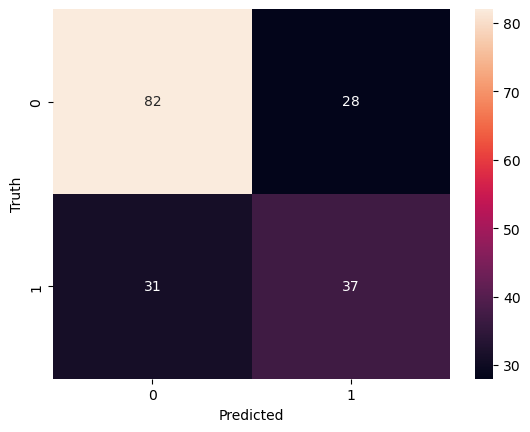

In [278]:
cm = confusion_matrix(y_test, y_pred)

# plot confusion_matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()